In [51]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [52]:
cancer = load_breast_cancer()
type(cancer)

sklearn.utils.Bunch

In [53]:
print(cancer.keys(),'\n')
print(cancer.data.shape,'\n')
print(cancer.target.shape,'\n')
print(cancer.feature_names,'\n')
print(cancer.DESCR,'\n')

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names']) 

(569, 30) 

(569,) 

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale 

In [54]:
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [55]:
df_new = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 5).all(axis=1)]
print(df.shape,df_new.shape)

(569, 31) (555, 31)


In [56]:
X = df_new.drop('target',axis=1)
Y = df_new['target']

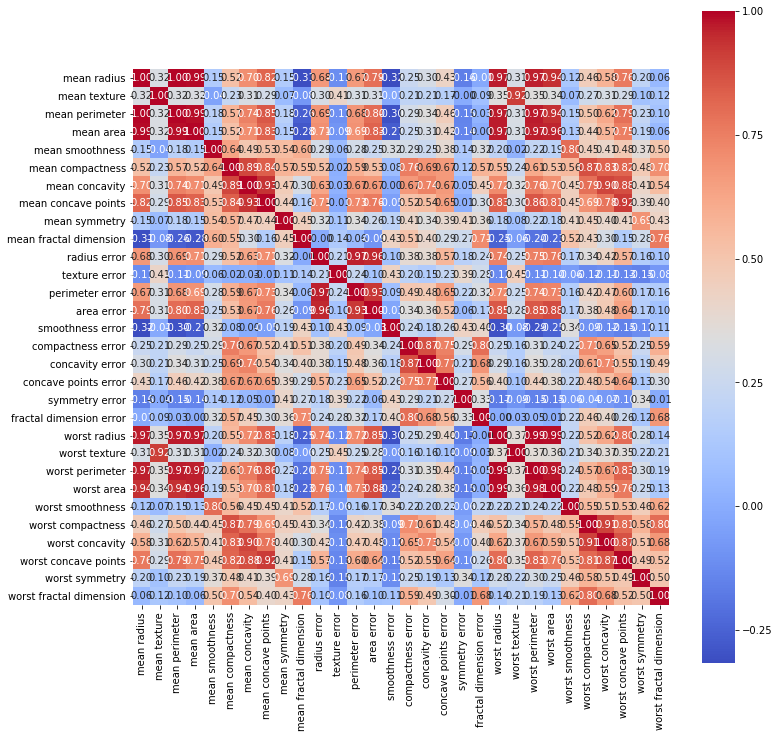

In [57]:
corr = X.corr()

plt.figure(figsize = (12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10}, cmap= 'coolwarm')
plt.show()

In [58]:
def evaluate(X,Y,n,a):
    
    train_score=0
    test_score=0
    
    
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)
        model = LogisticRegression(C=a).fit(X_train,Y_train)
        train_score+=model.score(X_train,Y_train)
        test_score+=model.score(X_test,Y_test)
        Y_predtrain =model.predict(X_train)
        Y_predtest = model.predict(X_test)
        
    print(train_score*100/n)
    print(test_score*100/n)

In [59]:
evaluate(X,Y,300,100)

97.55068728522315
95.94610778443099


In [60]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [61]:
model = LogisticRegression(C=100).fit(X_train, y_train)
y_predicted = model.predict(X_test)
confusion = confusion_matrix(y_test,y_predicted)

In [62]:
print('Logistic regression classifier confusion matrix\n', confusion)

Logistic regression classifier confusion matrix
 [[ 53   4]
 [  3 107]]


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [64]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predicted)))

Accuracy: 0.96
Precision: 0.96
Recall: 0.97
F1: 0.97


In [65]:
print("its good!")

its good!


D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


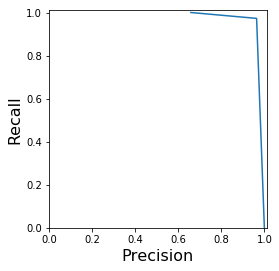

In [66]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


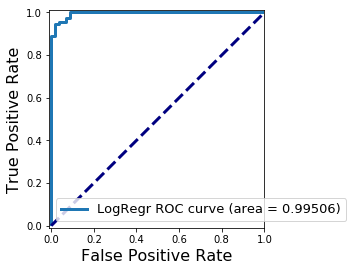

In [78]:
from sklearn.metrics import roc_curve, auc


y_score_lr = LogisticRegression(C=100).fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.5f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='best', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [73]:
print("its very gooood!!")

its very gooood!!
